# Prediction of Traffic Accident Risk
Team 7: 어서오십쇼HUMAN  
Editor: 김용현
## 1. Preprocess

In [1]:
# 사전 준비
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings

plt.style.use('seaborn')
sns.set(font_scale=2.5)

warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
sample = pd.read_csv('../input/sample_accident.csv')

print("sample.shape:", sample.shape)

# 초기 샘플 데이터
sample

sample.shape: (362297, 10)


,발생일,발생시간,요일,발생지_시군구,사고내용,노면상태,기상상태,도로형태_대분류,가해자차종,가해자연령
0,20100101,00시,금,마포구,경상,젖음/습기,맑음,단일로,승용차,54세
1,20100101,00시,금,동작구,중상,서리/결빙,맑음,단일로,승합차,57세
2,20100101,00시,금,관악구,경상,서리/결빙,흐림,단일로,승용차,51세
3,20100101,00시,금,강서구,경상,건조,맑음,교차로,승용차,56세
4,20100101,00시,금,구로구,경상,건조,맑음,교차로,승용차,33세
...,...,...,...,...,...,...,...,...,...,...
362292,20181231,23시,월,동작구,경상,건조,맑음,단일로,승용차,34세
362293,20181231,23시,월,강서구,부상신고,건조,맑음,교차로,승용차,56세
362294,20181231,23시,월,강동구,경상,건조,맑음,교차로,승용차,57세
362295,20181231,23시,월,강동구,경상,건조,맑음,단일로,승용차,59세


In [3]:
#Date,Time,Day,Location,Target,RoadState,Weather,RoadShape,Type,Age

sample.rename(columns={"발생일":"Date", "발생시간":"Time", "요일":"Day", "발생지_시군구":"Location", "사고내용":"Target", "노면상태":"RoadState", "기상상태":"Weather", "도로형태_대분류":"RoadShape","가해자차종":"Type", "가해자연령":"Age"}, inplace=True)

sample

,Date,Time,Day,Location,Target,RoadState,Weather,RoadShape,Type,Age
0,20100101,00시,금,마포구,경상,젖음/습기,맑음,단일로,승용차,54세
1,20100101,00시,금,동작구,중상,서리/결빙,맑음,단일로,승합차,57세
2,20100101,00시,금,관악구,경상,서리/결빙,흐림,단일로,승용차,51세
3,20100101,00시,금,강서구,경상,건조,맑음,교차로,승용차,56세
4,20100101,00시,금,구로구,경상,건조,맑음,교차로,승용차,33세
...,...,...,...,...,...,...,...,...,...,...
362292,20181231,23시,월,동작구,경상,건조,맑음,단일로,승용차,34세
362293,20181231,23시,월,강서구,부상신고,건조,맑음,교차로,승용차,56세
362294,20181231,23시,월,강동구,경상,건조,맑음,교차로,승용차,57세
362295,20181231,23시,월,강동구,경상,건조,맑음,단일로,승용차,59세


In [4]:
# Feature: 가해자연령

# 나이 불명인 열 삭제
sample = sample[sample['Age'] != '불명']

# 문자열 제거: ex 54'세' 제거
sample['Age'] = sample['Age'].str[:-1]

# dtype: object -> int
sample['Age'] = sample['Age'].astype('int')


In [5]:
# bins, labels
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90]
labels = ['10', '20', '30', '40', '50', '60', '70', '80']

# 나이대 분류
sample['AgeBand'] = pd.cut(sample['Age'], bins=bins, labels=labels)

# Drop NaN values
sample.dropna(how='any', inplace=True)

sample

,Date,Time,Day,Location,Target,RoadState,Weather,RoadShape,Type,Age,AgeBand
0,20100101,00시,금,마포구,경상,젖음/습기,맑음,단일로,승용차,54,50
1,20100101,00시,금,동작구,중상,서리/결빙,맑음,단일로,승합차,57,50
2,20100101,00시,금,관악구,경상,서리/결빙,흐림,단일로,승용차,51,50
3,20100101,00시,금,강서구,경상,건조,맑음,교차로,승용차,56,50
4,20100101,00시,금,구로구,경상,건조,맑음,교차로,승용차,33,30
...,...,...,...,...,...,...,...,...,...,...,...
362292,20181231,23시,월,동작구,경상,건조,맑음,단일로,승용차,34,30
362293,20181231,23시,월,강서구,부상신고,건조,맑음,교차로,승용차,56,50
362294,20181231,23시,월,강동구,경상,건조,맑음,교차로,승용차,57,50
362295,20181231,23시,월,강동구,경상,건조,맑음,단일로,승용차,59,50


In [6]:
DayArray =['일','월','화','수','목','금','토']
print(DayArray[0])
for a in range(0,len(DayArray)):
    sample['Day'] = np.where(sample['Day'] == DayArray[a],a,sample['Day'])

일


In [7]:
# Feature: Time

sample["Time"] = sample['Time'].str[:-1]

sample['Time'] = sample['Time'].astype('int')

In [8]:
# Feature: Target
TargetNameArr = ['Minor','Wound','Death','Heavy']

# 데이터명 수정
sample['Target'] = np.where(sample['Target'] == '경상', '0' ,sample['Target'])
sample['Target'] = np.where(sample['Target'] == '부상신고', '1',sample['Target'])
sample['Target'] = np.where(sample['Target'] == '사망', '2',sample['Target'])
sample['Target'] = np.where(sample['Target'] == '중상', '3',sample['Target'])

sample['Target'] = sample['Target'].astype('int')
temp = sample['Target']

#
sample['TargetOrigin'] = temp

# One-hot encoding
sample = pd.get_dummies(sample, columns=['Target'], prefix=['Target'])



In [9]:
temp = pd.get_dummies(sample.Location)
temp.columns[0]

'강남구'

In [10]:
# 각 타입별 타겟 데이터
typeData = pd.crosstab(sample.Type, sample.TargetOrigin, margins=True)
typeData

TargetOrigin,0,1,2,3,All
Type,,,,,
개인형이동수단(PM),37,17,1,21,76
건설기계,890,58,99,638,1685
기타,43,18,0,28,89
농기계,7,9,1,10,27
불명,105,26,5,77,213
사륜오토바이(ATV),7,5,0,5,17
승용차,155280,10578,1640,75608,243106
승합차,14419,1266,424,10014,26123
원동기장치자전거,5577,2076,187,3477,11317


In [11]:
weatherData = pd.crosstab(sample.Weather, sample.TargetOrigin, margins=True)
weatherData


TargetOrigin,0,1,2,3,All
Weather,,,,,
기타/불명,2085,246,18,988,3337
눈,1539,110,21,780,2450
맑음,181725,20540,2734,95933,300932
비,15213,1460,307,8606,25586
안개,44,4,1,35,84
흐림,10667,1210,271,6240,18388
All,211273,23570,3352,112582,350777


In [12]:
roadShapeDate = pd.crosstab(sample.RoadShape, sample.TargetOrigin, margins=True)
roadShapeDate

TargetOrigin,0,1,2,3,All
RoadShape,,,,,
교차로,83339,9267,1029,44431,138066
기타,2389,259,21,985,3654
기타/불명,4553,554,49,2352,7508
단일로,120926,13484,2251,64792,201453
불명,65,6,2,22,95
철길건널목,1,0,0,0,1
All,211273,23570,3352,112582,350777


In [13]:
roadStateData = pd.crosstab(sample.RoadState, sample.TargetOrigin, margins=True)
roadStateData

TargetOrigin,0,1,2,3,All
RoadState,,,,,
건조,183677,20876,2768,97269,304590
기타,3772,413,58,1974,6217
서리/결빙,1608,126,23,756,2513
적설,819,55,13,411,1298
젖음/습기,21393,2100,490,12170,36153
침수,3,0,0,1,4
해빙,1,0,0,1,2
All,211273,23570,3352,112582,350777


In [14]:
# Feature: Type.all 500개 미만 type 제거
for data, index in zip(typeData.All, typeData.index):
    if data < 500:
        sample = sample[sample['Type'] != index]

In [15]:
# Feature: Weather, RoadShape, RoadState 결측값(불명) 제거
sample = sample[sample['Weather'] != '불명']

sample = sample[sample['RoadShape'] != '불명']





In [16]:
sample

,Date,Time,Day,Location,RoadState,Weather,RoadShape,Type,Age,AgeBand,TargetOrigin,Target_0,Target_1,Target_2,Target_3
0,20100101,0,5,마포구,젖음/습기,맑음,단일로,승용차,54,50,0,1,0,0,0
1,20100101,0,5,동작구,서리/결빙,맑음,단일로,승합차,57,50,3,0,0,0,1
2,20100101,0,5,관악구,서리/결빙,흐림,단일로,승용차,51,50,0,1,0,0,0
3,20100101,0,5,강서구,건조,맑음,교차로,승용차,56,50,0,1,0,0,0
4,20100101,0,5,구로구,건조,맑음,교차로,승용차,33,30,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362292,20181231,23,1,동작구,건조,맑음,단일로,승용차,34,30,0,1,0,0,0
362293,20181231,23,1,강서구,건조,맑음,교차로,승용차,56,50,1,0,1,0,0
362294,20181231,23,1,강동구,건조,맑음,교차로,승용차,57,50,0,1,0,0,0
362295,20181231,23,1,강동구,건조,맑음,단일로,승용차,59,50,0,1,0,0,0


In [17]:
def preprocessing(feature):
    temp = pd.get_dummies(feature)
    temp = temp.columns
    print(temp)
    for a in range(0,len(temp)):
        feature = np.where(feature == temp[a],a,feature)
    return feature

In [18]:
sample.Location=preprocessing(sample.Location)
sample.Location
sample.RoadState = preprocessing(sample.RoadState)
sample.Weather = preprocessing(sample.Weather)
sample.RoadShape = preprocessing(sample.RoadShape)
sample.Type = preprocessing(sample.Type)

Index(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구',
       '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구',
       '용산구', '은평구', '종로구', '중구', '중랑구'],
      dtype='object')
Index(['건조', '기타', '서리/결빙', '적설', '젖음/습기', '침수', '해빙'], dtype='object')
Index(['기타/불명', '눈', '맑음', '비', '안개', '흐림'], dtype='object')
Index(['교차로', '기타', '기타/불명', '단일로'], dtype='object')
Index(['건설기계', '승용차', '승합차', '원동기장치자전거', '이륜차', '자전거', '특수차', '화물차'], dtype='object')


In [19]:

sample['Location'] = sample['Location'].astype('int')

sample['Day'] = sample['Day'].astype('int')
sample['RoadState'] = sample['RoadState'].astype('int')
sample['Weather'] = sample['Weather'].astype('int')
sample['RoadShape'] = sample['RoadShape'].astype('int')
sample['Type'] = sample['Type'].astype('int')

In [20]:
# 각 feature들의 type
sample.dtypes

Date               int64
Time               int32
Day                int32
Location           int32
RoadState          int32
Weather            int32
RoadShape          int32
Type               int32
Age                int32
AgeBand         category
TargetOrigin       int32
Target_0           uint8
Target_1           uint8
Target_2           uint8
Target_3           uint8
dtype: object

## 2. Save preprocessing data

In [21]:
# 전처리 데이터 저장(input/preprocessing.csv)
sample.to_csv('../input/preprocessing.csv', encoding='utf-8-sig',index_label=False)

In [22]:
preprocessing = pd.read_csv('../input/preprocessing.csv')

print("sample.shape:", preprocessing.shape)

# 초기 샘플 데이터
preprocessing

sample.shape: (350261, 15)


,Date,Time,Day,Location,RoadState,Weather,RoadShape,Type,Age,AgeBand,TargetOrigin,Target_0,Target_1,Target_2,Target_3
0,20100101,0,5,12,4,2,3,1,54,50,0,1,0,0,0
1,20100101,0,5,11,2,2,3,2,57,50,3,0,0,0,1
2,20100101,0,5,4,2,5,3,1,51,50,0,1,0,0,0
3,20100101,0,5,3,0,2,0,1,56,50,0,1,0,0,0
4,20100101,0,5,6,0,2,0,1,33,30,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362292,20181231,23,1,11,0,2,3,1,34,30,0,1,0,0,0
362293,20181231,23,1,3,0,2,0,1,56,50,1,0,1,0,0
362294,20181231,23,1,1,0,2,0,1,57,50,0,1,0,0,0
362295,20181231,23,1,1,0,2,3,1,59,50,0,1,0,0,0


## 3.EDA and Correlation Coefficient analysis

In [23]:
sample

,Date,Time,Day,Location,RoadState,Weather,RoadShape,Type,Age,AgeBand,TargetOrigin,Target_0,Target_1,Target_2,Target_3
0,20100101,0,5,12,4,2,3,1,54,50,0,1,0,0,0
1,20100101,0,5,11,2,2,3,2,57,50,3,0,0,0,1
2,20100101,0,5,4,2,5,3,1,51,50,0,1,0,0,0
3,20100101,0,5,3,0,2,0,1,56,50,0,1,0,0,0
4,20100101,0,5,6,0,2,0,1,33,30,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362292,20181231,23,1,11,0,2,3,1,34,30,0,1,0,0,0
362293,20181231,23,1,3,0,2,0,1,56,50,1,0,1,0,0
362294,20181231,23,1,1,0,2,0,1,57,50,0,1,0,0,0
362295,20181231,23,1,1,0,2,3,1,59,50,0,1,0,0,0


In [24]:
from sklearn.preprocessing import StandardScaler
sample2 = sample.drop(['AgeBand','Target_0','Target_1','Target_2','Target_3'],axis = "columns")

tsample = sample2[sample2['TargetOrigin']==0]
std_scaler = StandardScaler()
std_scaler.fit(tsample)
tsample = std_scaler.transform(tsample)   #normalize ,데이터 정규화 작업
tsample.shape

tsample2 = sample2[sample2['TargetOrigin']==1]
std_scaler = StandardScaler()
std_scaler.fit(tsample2)
tsample2 = std_scaler.transform(tsample2)   #normalize ,데이터 정규화 작업
tsample2.shape

tsample3 = sample2[sample2['TargetOrigin']==2]
std_scaler = StandardScaler()
std_scaler.fit(tsample3)
tsample3 = std_scaler.transform(tsample3)   #normalize ,데이터 정규화 작업
tsample3.shape

tsample4 = sample2[sample2['TargetOrigin']==3]
std_scaler = StandardScaler()
std_scaler.fit(tsample4)
tsample4 = std_scaler.transform(tsample4)   #normalize ,데이터 정규화 작업
tsample4.shape

(112419, 10)

In [25]:
corr = np.corrcoef(np.transpose(tsample))
corr2 = np.corrcoef(np.transpose(tsample2))
corr3 = np.corrcoef(np.transpose(tsample3))
corr4 = np.corrcoef(np.transpose(tsample4))


In [26]:
corr

array([[ 1.00000000e+00,  2.55586616e-02, -2.59591165e-03,
         1.02394898e-03, -8.34230063e-02, -6.13501399e-02,
        -2.95333209e-02,  1.06367280e-02,  9.54041129e-02,
                    nan],
       [ 2.55586616e-02,  1.00000000e+00, -1.85249424e-02,
         1.39261764e-02, -3.87000671e-02, -9.05774381e-03,
         2.84085472e-02,  4.89475910e-02, -1.81375939e-02,
                    nan],
       [-2.59591165e-03, -1.85249424e-02,  1.00000000e+00,
        -2.68956182e-03, -1.99292695e-02, -9.40646406e-03,
         1.57796706e-02, -1.18835172e-04, -6.71118113e-03,
                    nan],
       [ 1.02394898e-03,  1.39261764e-02, -2.68956182e-03,
         1.00000000e+00,  1.44710266e-03,  1.96820893e-02,
        -9.46810249e-03,  3.00326433e-02,  3.25702175e-02,
                    nan],
       [-8.34230063e-02, -3.87000671e-02, -1.99292695e-02,
         1.44710266e-03,  1.00000000e+00,  4.35443990e-01,
        -1.05428562e-02, -2.07490641e-02, -8.14873499e-03,
           

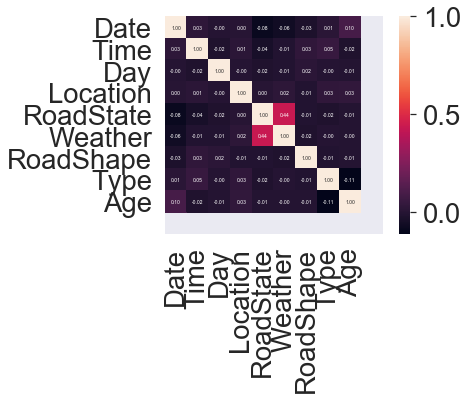

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
label = sample.columns[:9]
heatmap2 = sns.heatmap(corr,cbar = True,annot = True,square = True,fmt = '.2f',annot_kws = {'size':5},
                      yticklabels = label,xticklabels = label)
plt.show()

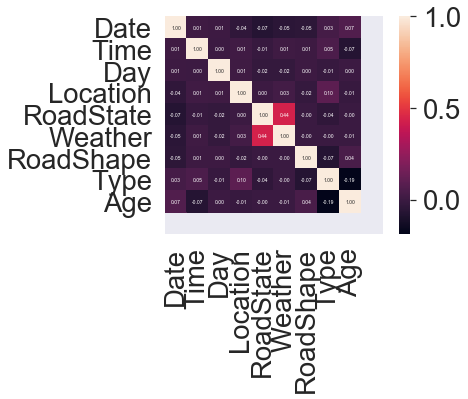

In [28]:

heatmap2 = sns.heatmap(corr2,cbar = True,annot = True,square = True,fmt = '.2f',annot_kws = {'size':5},
                      yticklabels = label,xticklabels = label)
plt.show()

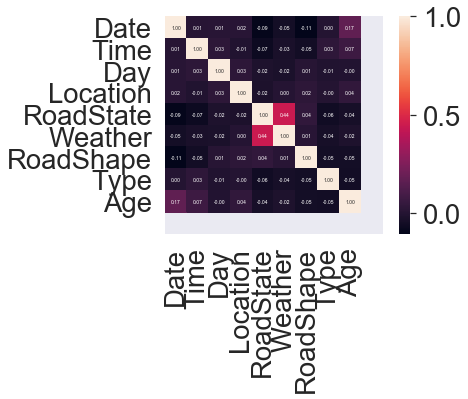

In [29]:

heatmap2 = sns.heatmap(corr3,cbar = True,annot = True,square = True,fmt = '.2f',annot_kws = {'size':5},
                      yticklabels = label,xticklabels = label)
plt.show()

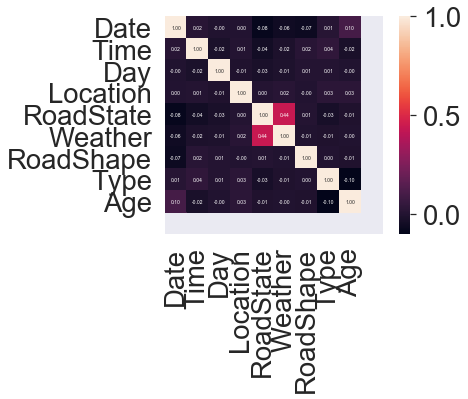

In [30]:
heatmap2 = sns.heatmap(corr4,cbar = True,annot = True,square = True,fmt = '.2f',annot_kws = {'size':5},
                      yticklabels = label,xticklabels = label)
plt.show()